<a href="https://www.kaggle.com/code/retnowardani/pcos-classification-model1dcnn?scriptVersionId=250220824" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Exploratory Data Analysis (EDA)**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/pcos-prediction-datasettop-75-countries/pcos_prediction_dataset.csv', keep_default_na=False, na_values=[])

In [3]:
data

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,None,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,None,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,Guinea,28,Normal,Regular,No,Moderate,Yes,No,3,Low,Urban,Middle,Yes,Yes,0.090663,African,No
119996,Mozambique,35,Overweight,Regular,No,None,No,No,5,Low,Rural,High,Yes,Yes,0.167482,Asian,No
119997,Cambodia,16,Normal,Regular,No,Moderate,No,No,9,Medium,Rural,Low,Yes,Yes,0.236241,African,Yes
119998,Benin,15,Obese,Regular,Yes,None,Yes,Yes,1,Medium,Rural,High,No,No,0.119993,Hispanic,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                120000 non-null  object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [5]:
data.columns

Index(['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism',
       'Acne Severity', 'Family History of PCOS', 'Insulin Resistance',
       'Lifestyle Score', 'Stress Levels', 'Urban/Rural',
       'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns',
       'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')

In [6]:
data.isnull().sum()

Country                        0
Age                            0
BMI                            0
Menstrual Regularity           0
Hirsutism                      0
Acne Severity                  0
Family History of PCOS         0
Insulin Resistance             0
Lifestyle Score                0
Stress Levels                  0
Urban/Rural                    0
Socioeconomic Status           0
Awareness of PCOS              0
Fertility Concerns             0
Undiagnosed PCOS Likelihood    0
Ethnicity                      0
Diagnosis                      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
for col in data.columns:
    print(f"\nFitur: {col}")
    print(data[col].unique())


Fitur: Country
['Madagascar' 'Vietnam' 'Somalia' 'Malawi' 'France' 'Rwanda' 'Tanzania'
 'United States' 'Italy' 'Australia' 'India' 'Argentina' 'Morocco'
 'Zambia' 'Romania' 'Sudan' 'Benin' 'Burkina Faso' 'Nepal' 'Mali'
 'Malaysia' 'Chile' 'Mozambique' 'Ivory Coast' 'Taiwan' 'Nigeria'
 'Zimbabwe' 'Uzbekistan' 'Germany' 'Indonesia' 'Egypt' 'Russia' 'Chad'
 'Peru' 'Bangladesh' 'Iraq' 'Canada' 'Cameroon' 'Brazil' 'North Korea'
 'Kazakhstan' 'Uganda' 'Guinea' 'Yemen' 'Saudi Arabia' 'South Korea'
 'Afghanistan' 'Spain' 'Ghana' 'Guatemala' 'China' 'Japan' 'Pakistan'
 'Kenya' 'Ethiopia' 'South Africa' 'Poland' 'Colombia' 'Burundi'
 'Venezuela' 'Philippines' 'Ukraine' 'Ecuador' 'Sri Lanka' 'Cambodia'
 'Niger' 'Thailand' 'Netherlands' 'Iran' 'Senegal' 'Turkey'
 'United Kingdom' 'Syria' 'Algeria' 'Myanmar' 'Angola' 'Mexico']

Fitur: Age
[26 16 41 27 17 39 38 47 21 25 20 46 19 35 48 22 29 31 36 37 34 40 33 18
 42 49 44 28 15 24 32 30 23 43 45]

Fitur: BMI
['Overweight' 'Underweight' 'Normal' 'Ob

Diagnosis
No     107405
Yes     12595
Name: count, dtype: int64


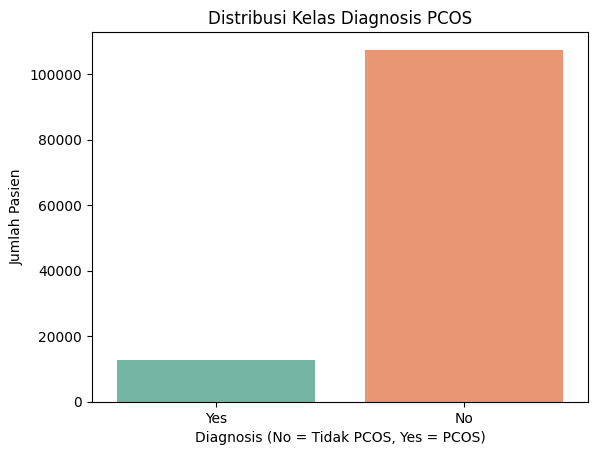

In [9]:
print(data['Diagnosis'].value_counts())

sns.countplot(x='Diagnosis', data=data, palette='Set2')
plt.title('Distribusi Kelas Diagnosis PCOS')
plt.xlabel('Diagnosis (No = Tidak PCOS, Yes = PCOS)')
plt.ylabel('Jumlah Pasien')
plt.show()

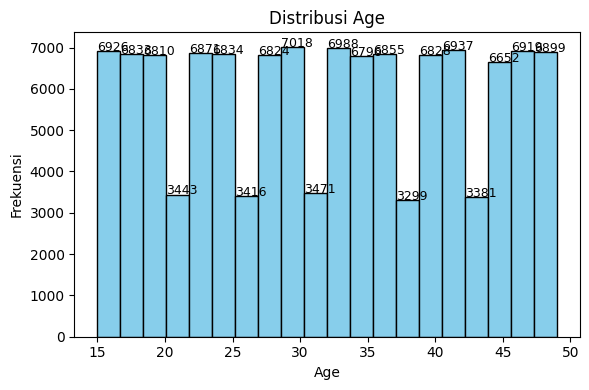

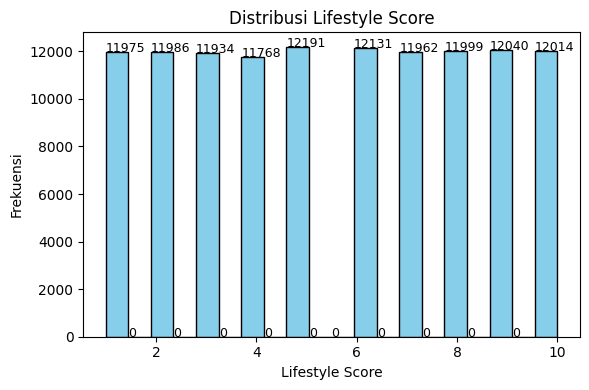

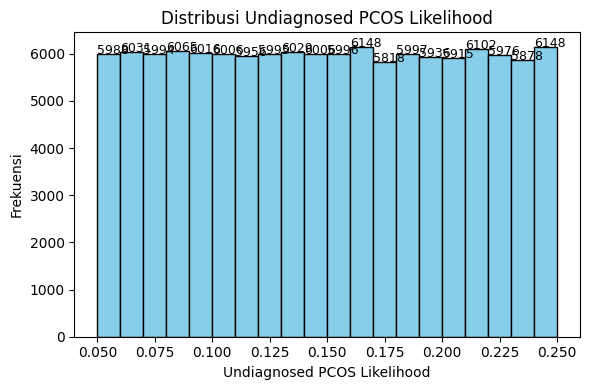

In [10]:
numerik = ['Age', 'Lifestyle Score','Undiagnosed PCOS Likelihood']

for col in numerik:
    plt.figure(figsize=(6, 4))
    counts, bins, patches = plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    
    # Tambahkan label angka di atas setiap batang
    for count, bin_edge in zip(counts, bins[:-1]):
        plt.text(bin_edge, count + 0.5, str(int(count)), fontsize=9, ha='left')

    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

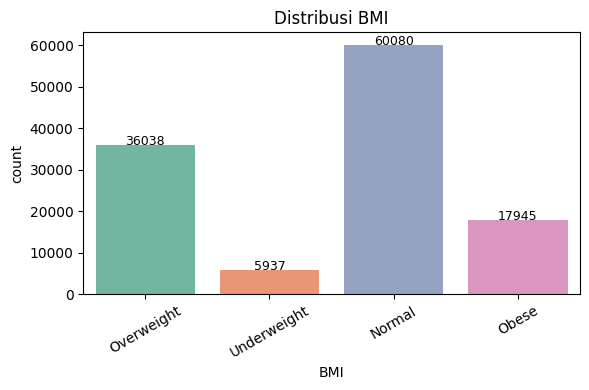

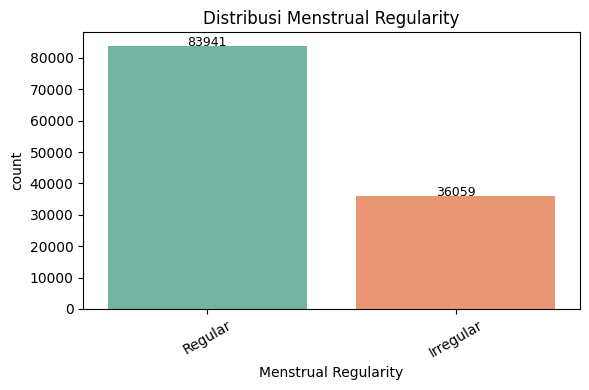

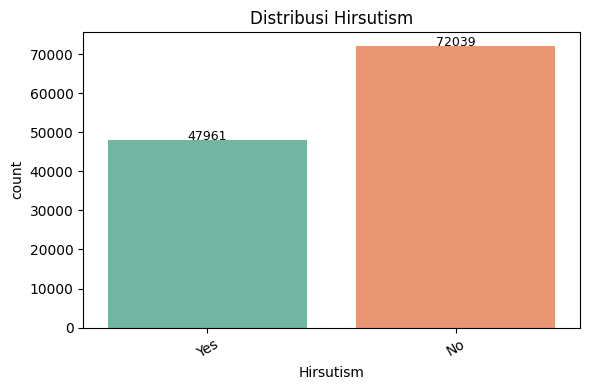

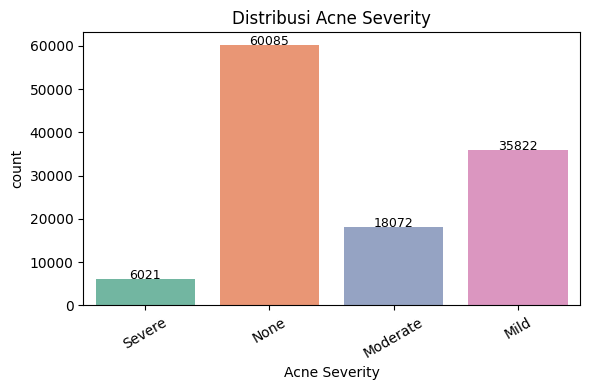

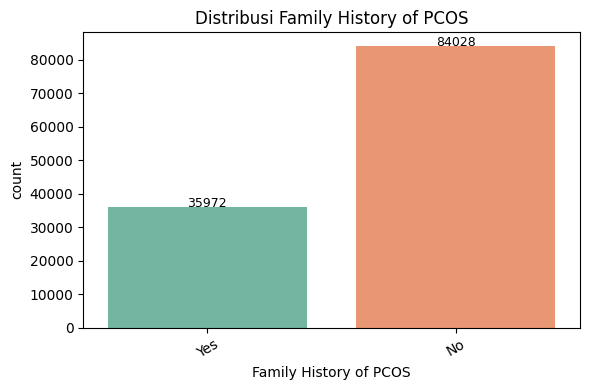

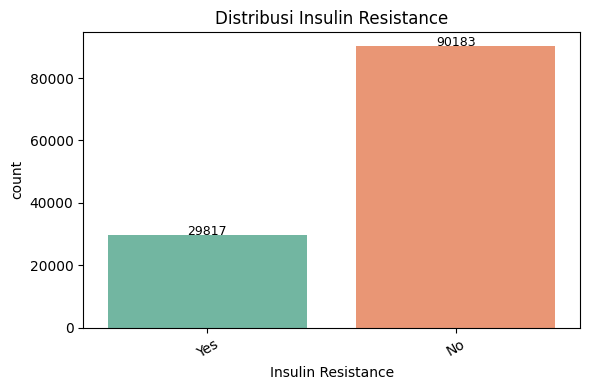

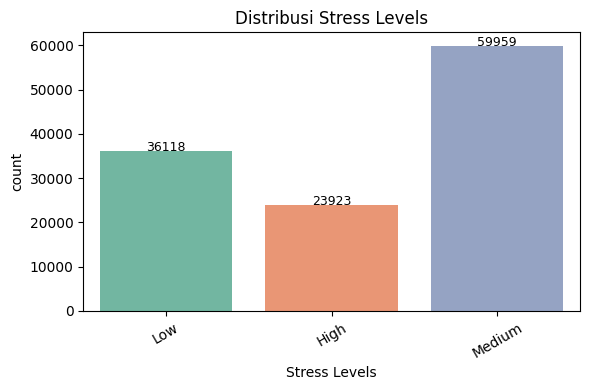

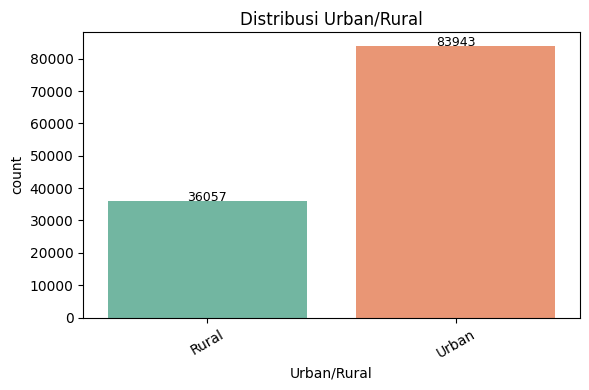

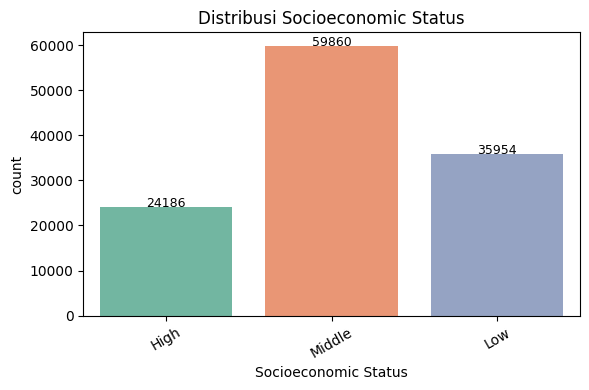

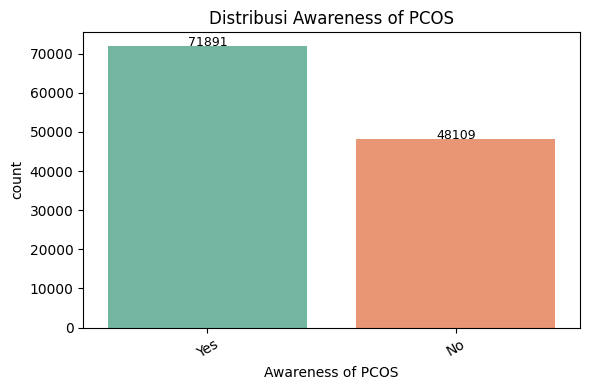

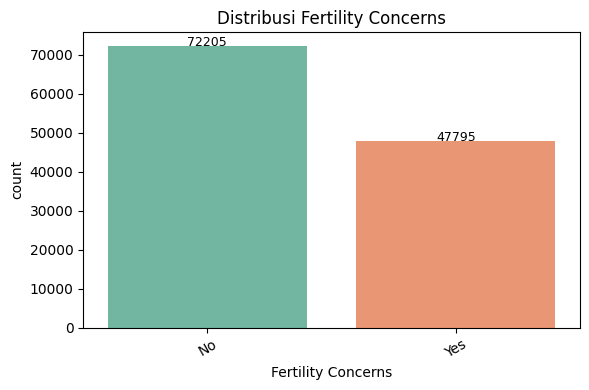

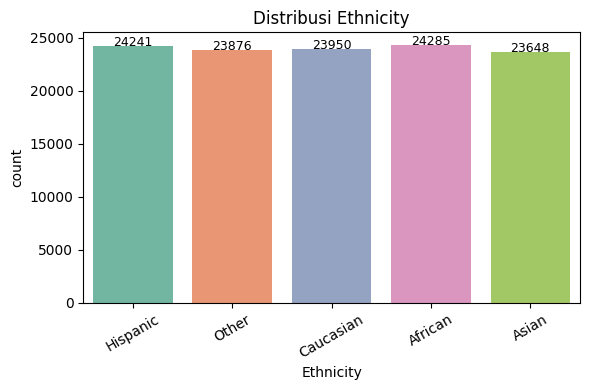

In [11]:
import seaborn as sns

kategorikal = ['BMI', 'Menstrual Regularity', 'Hirsutism', 'Acne Severity','Family History of PCOS', 'Insulin Resistance', 'Stress Levels','Urban/Rural', 'Socioeconomic Status', 'Awareness of PCOS','Fertility Concerns', 'Ethnicity']

for col in kategorikal:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=col, data=data, palette='Set2')

    # Tambahkan angka di atas batang
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=9)

    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

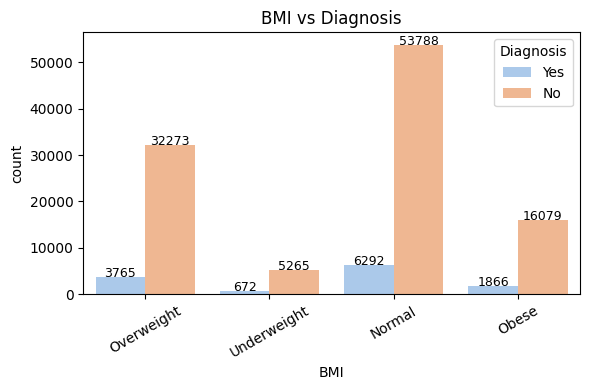

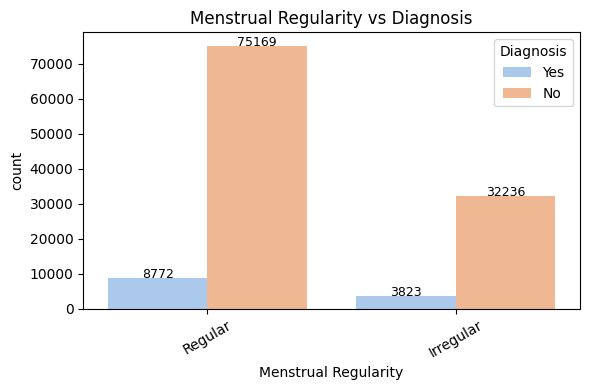

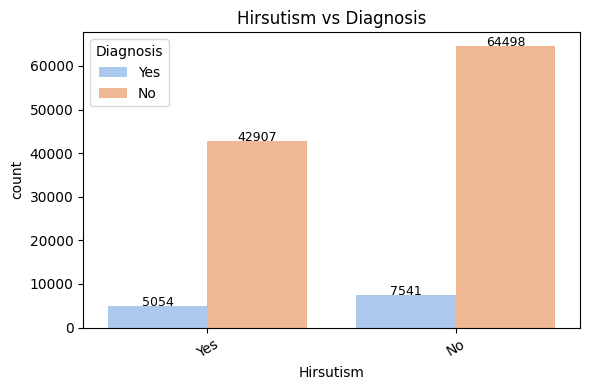

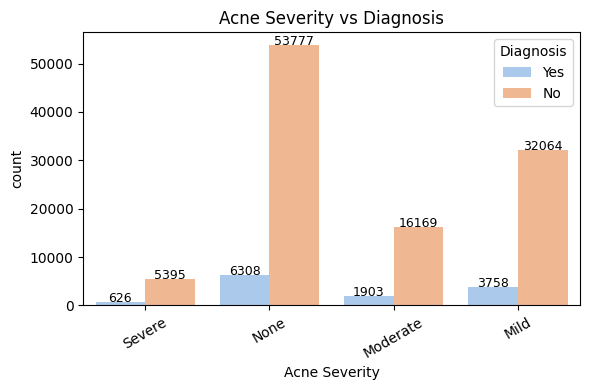

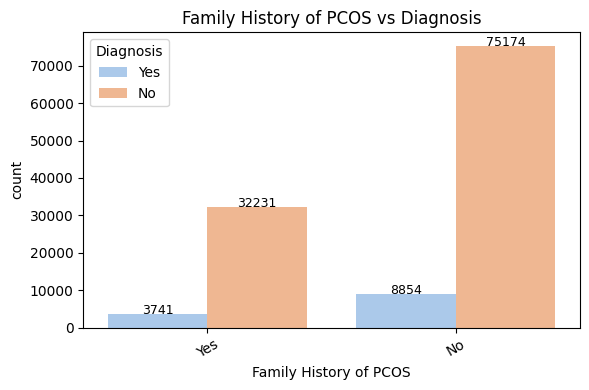

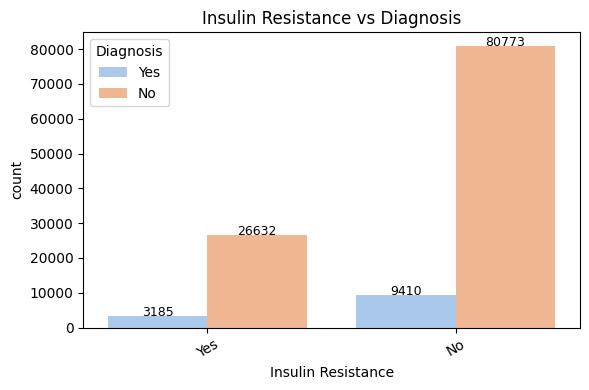

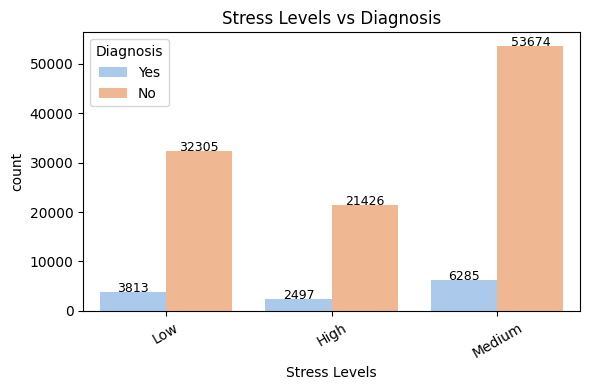

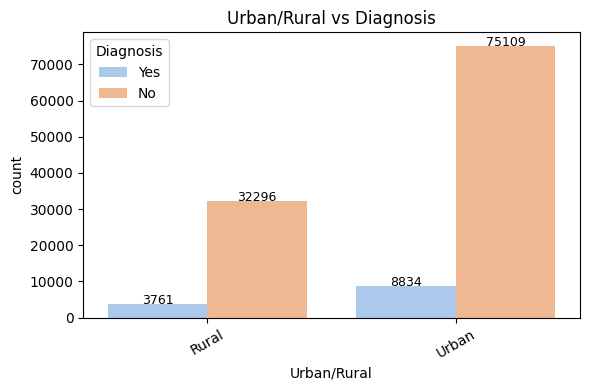

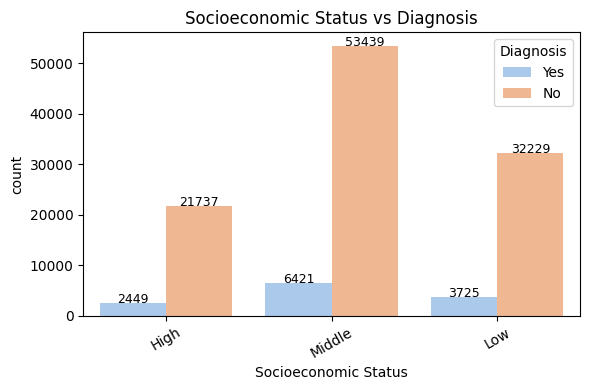

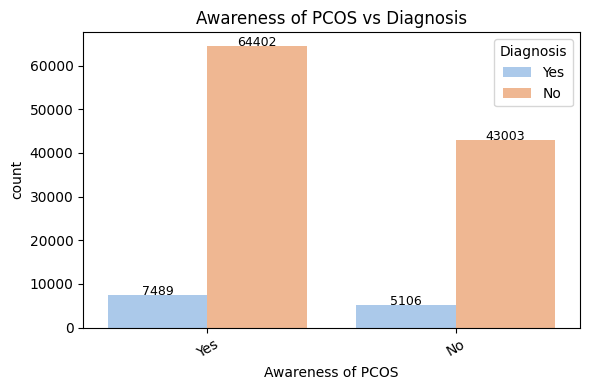

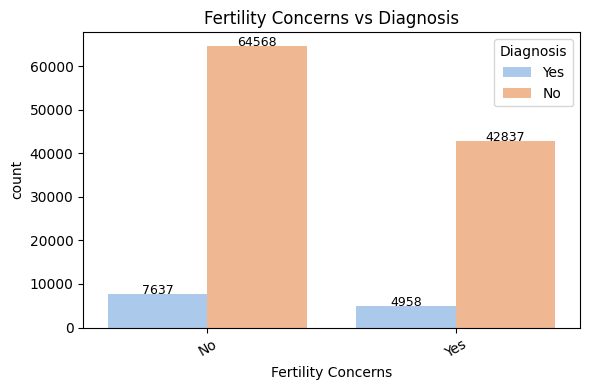

In [12]:
for col in kategorikal[:-1]:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=col, hue='Diagnosis', data=data, palette='pastel')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=9)

    plt.title(f'{col} vs Diagnosis')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

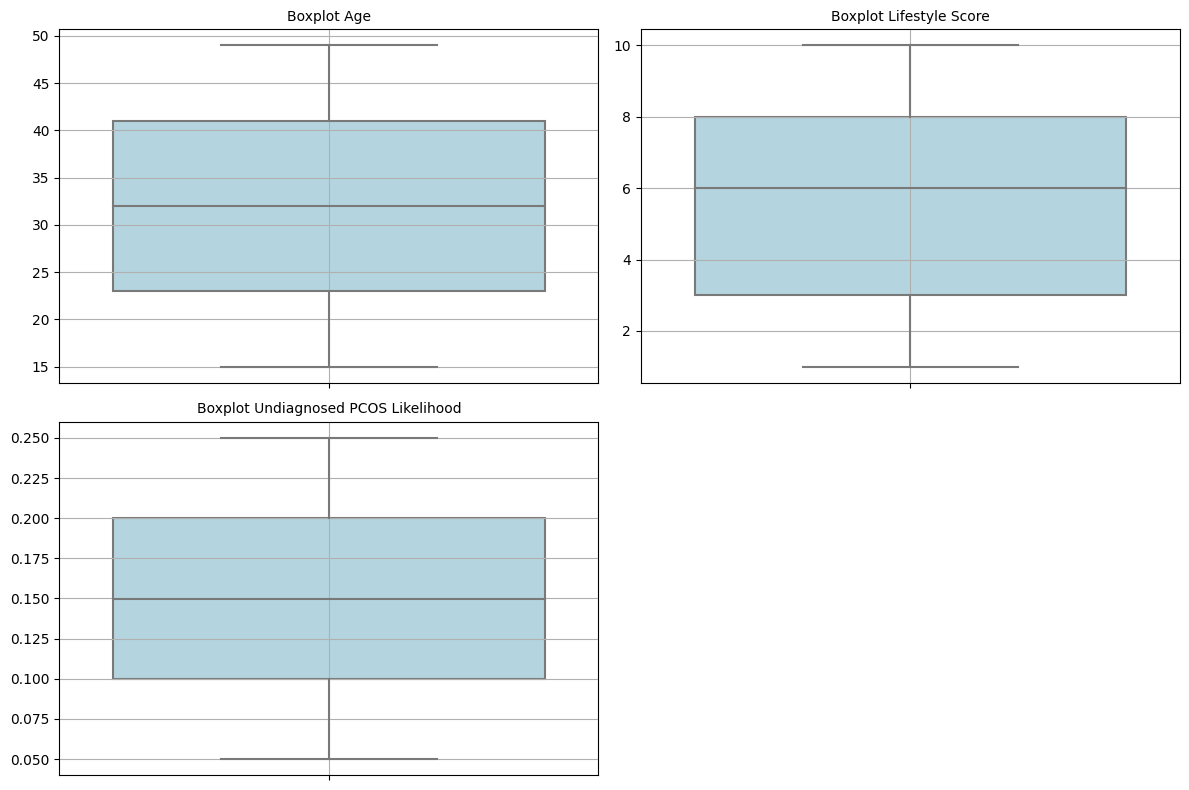

In [13]:
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns

n_cols = 2
n_rows = (len(kolom_numerik) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, kolom in enumerate(kolom_numerik):
    sns.boxplot(y=data[kolom], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot {kolom}', fontsize=10)
    axes[i].set_ylabel('')
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


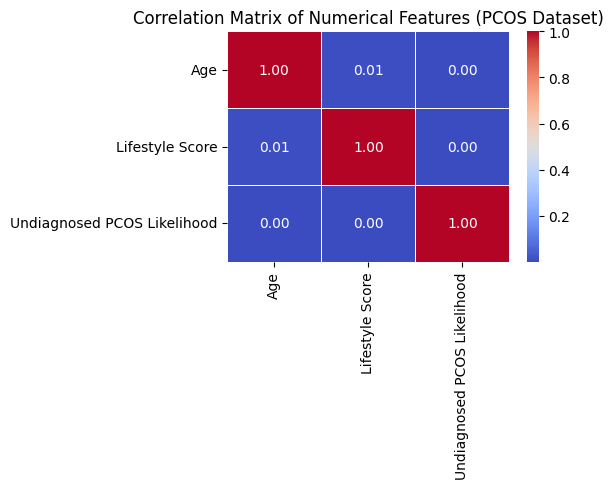

In [14]:
correlation_matrix = data[numerik].corr()

# Visualisasi heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features (PCOS Dataset)', fontsize=12)
plt.tight_layout()
plt.show()

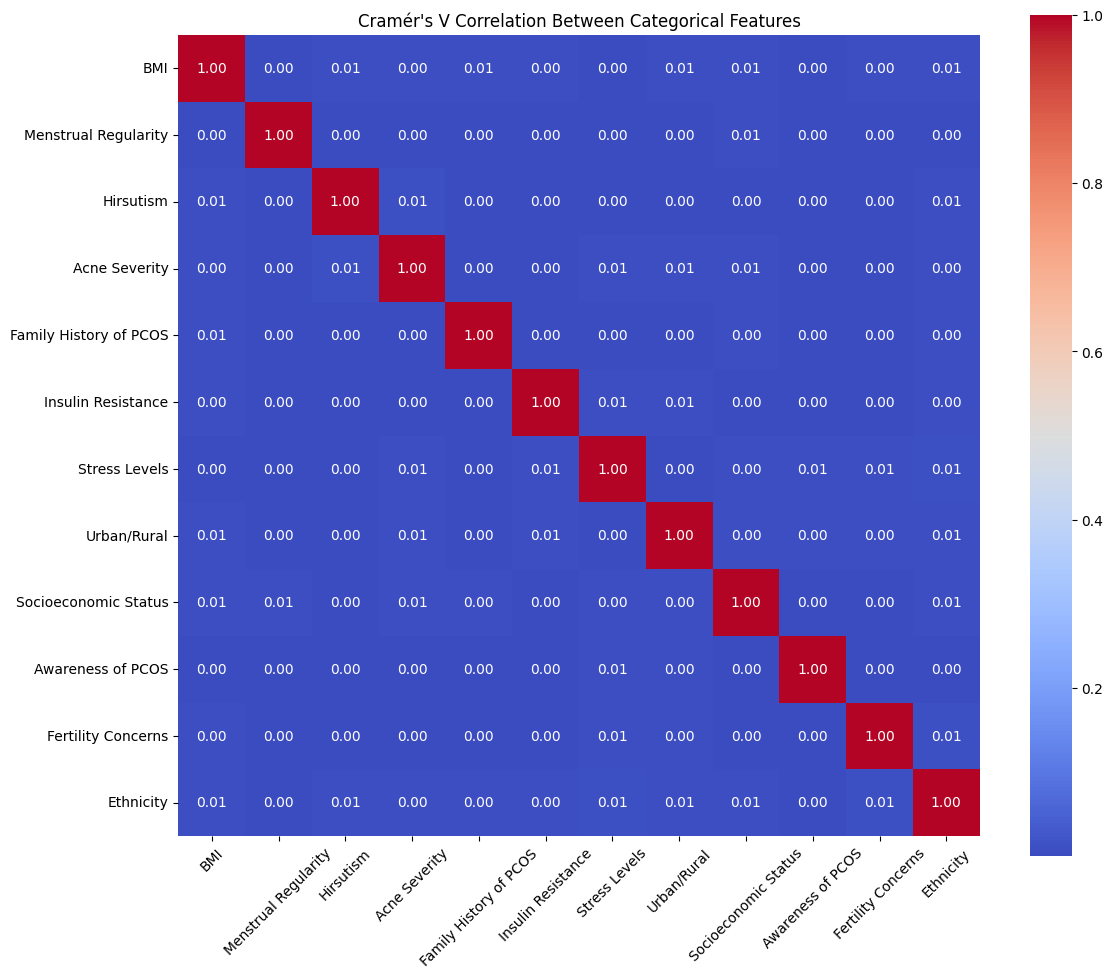

In [15]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

cramers_matrix = pd.DataFrame(np.zeros((len(kategorikal), len(kategorikal))),
                              index=kategorikal, columns=kategorikal)

for col1 in kategorikal:
    for col2 in kategorikal:
        cramers_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Cramér's V Correlation Between Categorical Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

data['Diagnosis'] = data['Diagnosis'].astype('category')

cramers_result = {}

for col in kategorikal:
    try:
        v = cramers_v(data[col], data['Diagnosis'])
        cramers_result[col] = round(v, 3)
    except:
        cramers_result[col] = np.nan

cramers_sorted = dict(sorted(cramers_result.items(), key=lambda item: item[1], reverse=True))
print("Cramér's V antara fitur kategorikal dan Diagnosis:\n")
for fitur, nilai in cramers_sorted.items():
    print(f"{fitur}: {nilai}")

Cramér's V antara fitur kategorikal dan Diagnosis:

Socioeconomic Status: 0.008
Ethnicity: 0.007
BMI: 0.006
Insulin Resistance: 0.003
Awareness of PCOS: 0.003
Fertility Concerns: 0.003
Menstrual Regularity: 0.002
Family History of PCOS: 0.002
Hirsutism: 0.001
Acne Severity: 0.001
Stress Levels: 0.001
Urban/Rural: 0.001


# **Preprocessing Data**

In [17]:
data = data.drop(columns='Country')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Age                          120000 non-null  int64   
 1   BMI                          120000 non-null  object  
 2   Menstrual Regularity         120000 non-null  object  
 3   Hirsutism                    120000 non-null  object  
 4   Acne Severity                120000 non-null  object  
 5   Family History of PCOS       120000 non-null  object  
 6   Insulin Resistance           120000 non-null  object  
 7   Lifestyle Score              120000 non-null  int64   
 8   Stress Levels                120000 non-null  object  
 9   Urban/Rural                  120000 non-null  object  
 10  Socioeconomic Status         120000 non-null  object  
 11  Awareness of PCOS            120000 non-null  object  
 12  Fertility Concerns           120000 non-null

In [19]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis'].map({'No': 0, 'Yes': 1}) 

In [20]:
from sklearn.model_selection import train_test_split

# Split awal 80% (train+val) vs 20% (test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# train (87.5%) dan val (12.5%) dari 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.125,  # karena 0.125 * 0.8 = 0.10 dari total
    random_state=42,
    stratify=y_temp
)

In [21]:
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (84000, 15)
Validation: (12000, 15)
Test: (24000, 15)


In [22]:
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [24]:
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep   = preprocessor.transform(X_val)
X_test_prep  = preprocessor.transform(X_test)

In [25]:
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numerical_features + ohe_feature_names.tolist()
X_train_array = X_train_prep.toarray() if hasattr(X_train_prep, "toarray") else X_train_prep
X_train_df = pd.DataFrame(X_train_array, columns=all_feature_names)
X_train_df.head()

,Age,Lifestyle Score,Undiagnosed PCOS Likelihood,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight,Menstrual Regularity_Irregular,Menstrual Regularity_Regular,Hirsutism_No,...,Socioeconomic Status_Middle,Awareness of PCOS_No,Awareness of PCOS_Yes,Fertility Concerns_No,Fertility Concerns_Yes,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Other
0,-0.295688,0.867467,1.202691,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-0.790743,-0.876377,-1.157621,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.793433,-0.876377,-0.091459,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.991455,-0.527608,-0.441794,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-0.097666,0.169929,-0.923410,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_prep, y_train)

print("Setelah SMOTE:")
print("Train:", X_train_bal.shape)
print("Distribusi label:", dict(zip(*np.unique(y_train_bal, return_counts=True))))

Setelah SMOTE:
Train: (150366, 36)
Distribusi label: {0: 75183, 1: 75183}


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_bal)
X_val_pca   = pca.transform(X_val_prep)
X_test_pca  = pca.transform(X_test_prep)

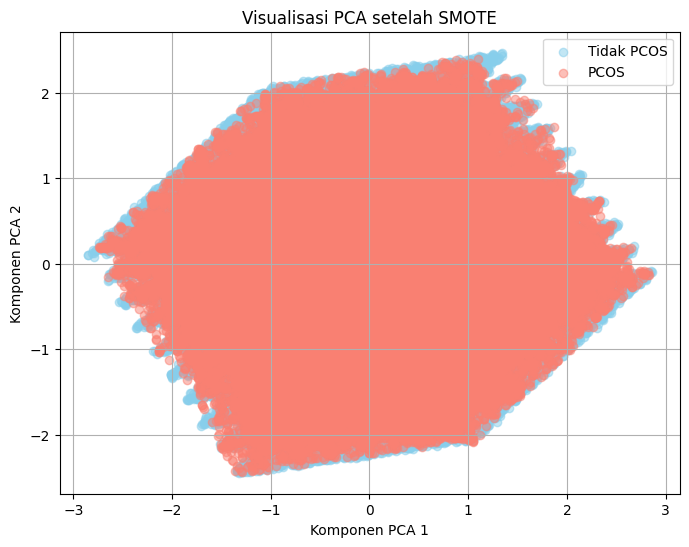

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_bal)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[y_train_bal == 0, 0], X_pca_2d[y_train_bal == 0, 1], alpha=0.5, label='Tidak PCOS', c='skyblue')
plt.scatter(X_pca_2d[y_train_bal == 1, 0], X_pca_2d[y_train_bal == 1, 1], alpha=0.5, label='PCOS', c='salmon')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.title('Visualisasi PCA setelah SMOTE')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
X_train_pca = X_train_pca.astype('float32')
X_val_pca   = X_val_pca.astype('float32')
X_test_pca  = X_test_pca.astype('float32')

X_train_cnn = X_train_pca.reshape(X_train_pca.shape[0], X_train_pca.shape[1], 1)
X_val_cnn   = X_val_pca.reshape(X_val_pca.shape[0], X_val_pca.shape[1], 1)
X_test_cnn  = X_test_pca.reshape(X_test_pca.shape[0], X_test_pca.shape[1], 1)

print("X_train_cnn:", X_train_cnn.shape)
print("X_val_cnn:", X_val_cnn.shape)
print("X_test_cnn:", X_test_cnn.shape)

X_train_cnn: (150366, 21, 1)
X_val_cnn: (12000, 21, 1)
X_test_cnn: (24000, 21, 1)


In [31]:
y_train_bal = y_train_bal.astype('int32')
y_val = y_val.astype('int32')

In [32]:
print(type(y_train_bal), y_train_bal.dtype)
print(type(y_val), y_val.dtype)

<class 'pandas.core.series.Series'> int32
<class 'pandas.core.series.Series'> int32


# **Model Development**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

2025-07-13 07:13:33.532168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752390813.788113      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752390813.863392      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-13 07:13:50.183345: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [34]:
history = model.fit(
    X_train_cnn, y_train_bal,
    validation_data=(X_val_cnn, y_val),
    epochs=25,
    batch_size=256,
    verbose=1
)

Epoch 1/25
588/588 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6274 - auc: 0.6729 - loss: 0.6757 - val_accuracy: 0.1243 - val_auc: 0.5001 - val_loss: 1.1084
Epoch 2/25
588/588 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.7195 - auc: 0.7885 - loss: 0.5403 - val_accuracy: 0.7593 - val_auc: 0.4940 - val_loss: 0.5688
Epoch 3/25
588/588 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.7339 - auc: 0.8076 - loss: 0.5159 - val_accuracy: 0.5601 - val_auc: 0.5046 - val_loss: 0.7137
Epoch 4/25
588/588 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7444 - auc: 0.8185 - loss: 0.5007 - val_accuracy: 0.7098 - val_auc: 0.5060 - val_loss: 0.5983
Epoch 5/25
588/588 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.7525 - auc: 0.8248 - loss: 0.4906 - val_accuracy: 0.4676 - val_auc: 0.5084 - val_loss: 0.8115
Epoch 6/25
588/588 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7595 - auc: 0.8339 - loss: 0.4771 - val_accuracy: 0.3086 - val_auc: 0.5023 - val_loss: 1.0001
Epoch 7/25
588/588 ━━━━━━━━━

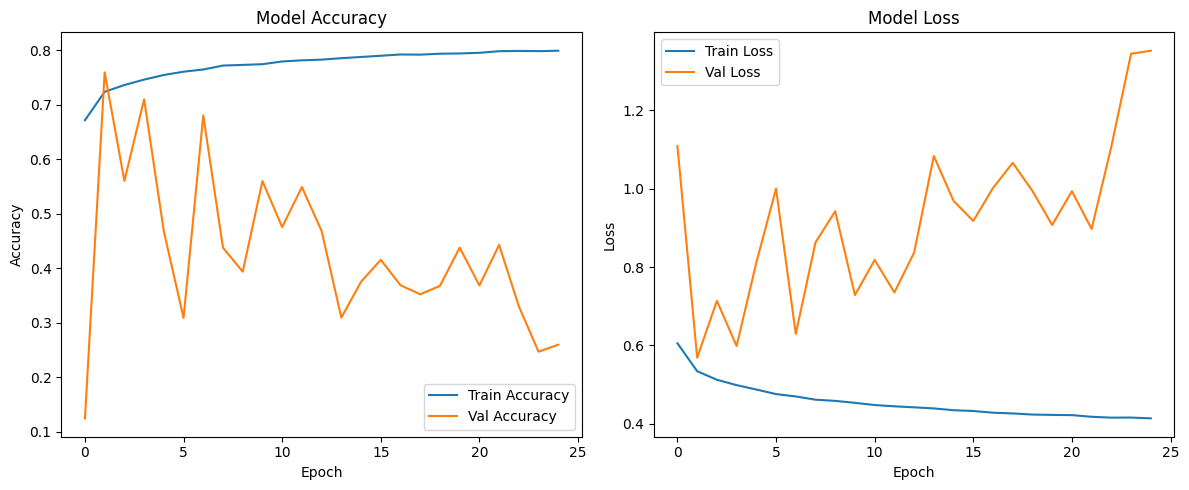

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
y_test = y_test.astype('int32')

In [37]:
loss, accuracy, auc = model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

Test Accuracy: 0.2640
Test AUC: 0.5002


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Classification Report:
              precision    recall  f1-score   support

     No PCOS       0.89      0.20      0.33     21481
    Yes PCOS       0.10      0.79      0.18      2519

    accuracy                           0.26     24000
   macro avg       0.50      0.50      0.26     24000
weighted avg       0.81      0.26      0.31     24000



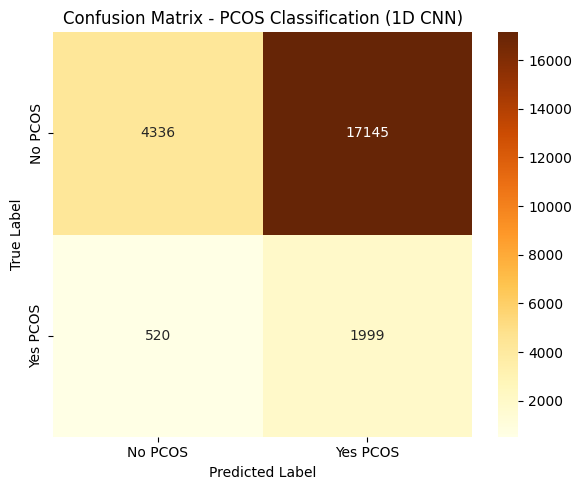

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_prob = model.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
labels = ['No PCOS', 'Yes PCOS']

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - PCOS Classification (1D CNN)')
plt.tight_layout()
plt.show()


# **XGBoost**

In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_pca.astype('float32'), y_train_bal)

y_pred_prob = xgb_model.predict_proba(X_test_pca)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("=== XGBoost ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== XGBoost ===
Confusion Matrix:
[[19785  1696]
 [ 2327   192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     21481
           1       0.10      0.08      0.09      2519

    accuracy                           0.83     24000
   macro avg       0.50      0.50      0.50     24000
weighted avg       0.81      0.83      0.82     24000



# **Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train_bal)

y_pred_prob = rf_model.predict_proba(X_test_pca)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("=== Random Forest ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Random Forest ===
Confusion Matrix:
[[20305  1176]
 [ 2387   132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     21481
           1       0.10      0.05      0.07      2519

    accuracy                           0.85     24000
   macro avg       0.50      0.50      0.49     24000
weighted avg       0.81      0.85      0.83     24000



# **TabNet**

In [42]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [43]:
from pytorch_tabnet.tab_model import TabNetClassifier

y_train_np = y_train_bal.values if hasattr(y_train_bal, 'values') else y_train_bal
y_val_np   = y_val.values if hasattr(y_val, 'values') else y_val
y_test_np  = y_test.values if hasattr(y_test, 'values') else y_test


tabnet_model = TabNetClassifier(seed=42,verbose=1)
tabnet_model.fit(
    X_train=X_train_pca, y_train=y_train_np,
    eval_set=[(X_val_pca, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=30,
    patience=5,
    batch_size=256,
    virtual_batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.69034 | val_accuracy: 0.7945  |  0:00:18s
epoch 1  | loss: 0.66838 | val_accuracy: 0.70067 |  0:00:36s
epoch 2  | loss: 0.65783 | val_accuracy: 0.67567 |  0:00:54s
epoch 3  | loss: 0.65586 | val_accuracy: 0.84175 |  0:01:13s
epoch 4  | loss: 0.65723 | val_accuracy: 0.65267 |  0:01:31s
epoch 5  | loss: 0.65151 | val_accuracy: 0.803   |  0:01:49s
epoch 6  | loss: 0.65313 | val_accuracy: 0.67508 |  0:02:07s
epoch 7  | loss: 0.65688 | val_accuracy: 0.69742 |  0:02:24s
epoch 8  | loss: 0.65493 | val_accuracy: 0.7375  |  0:02:42s

Early stopping occurred at epoch 8 with best_epoch = 3 and best_val_accuracy = 0.84175


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [44]:
y_pred_prob = tabnet_model.predict_proba(X_test_pca)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("=== TabNet Evaluation ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_np, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))

=== TabNet Evaluation ===
Confusion Matrix:
[[20154  1327]
 [ 2340   179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     21481
           1       0.12      0.07      0.09      2519

    accuracy                           0.85     24000
   macro avg       0.51      0.50      0.50     24000
weighted avg       0.81      0.85      0.83     24000



# **Analisis Hasil**

## Perbandingan Model Klasifikasi untuk Deteksi PCOS

| **Model**      | **Accuracy** | **Recall (Yes PCOS)** | **Precision (Yes PCOS)** | **F1-Score (Yes PCOS)** |
|----------------|--------------|------------------------|---------------------------|--------------------------|
| **1D-CNN**     | 0.58         | 0.39                   | 0.10                      | 0.16                     |
| **Random Forest** | 0.85       | 0.05                   | 0.10                      | 0.07                     |
| **XGBoost**    | 0.83         | 0.08                   | 0.10                      | 0.09                     |
| **TabNet**     | 0.88         | 0.02                   | 0.09                      | 0.03                     |

---

### Analisis

- **1D-CNN** unggul dalam recall (mendeteksi PCOS) meskipun akurasinya rendah.
- **Random Forest & XGBoost** sangat kuat untuk mendeteksi kelas mayoritas (No PCOS) tapi lemah untuk PCOS.
- **TabNet** memiliki akurasi tinggi namun recall PCOS-nya sangat rendah, sehingga berisiko untuk diagnosis.
- F1-Score terbaik tetap **1D-CNN**, karena cukup seimbang meski nilainya rendah.